In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyod

# Let's load up the pre-processed feature data and get to work!

In [3]:
elon_df = pd.read_csv('./tweet_data/scaled_tweet_features.csv').drop('Unnamed: 0',axis='columns')

In [24]:
elon_df.columns

Index(['hashtags_token', 'mentions_token', 'reply_to_token', 'text_neg',
       'text_neu', 'text_pos', 'text_compound', 'hashtags_neg', 'hashtags_neu',
       'hashtags_pos', 'hashtags_compound', 'hour', 'delta_time',
       'log10_delta_time', 'dcompound_dTime', 'dcompound_dTweet',
       'integral_compound_5', 'integral_compound_10', 'delta_compound_mean',
       'delta_compound_median'],
      dtype='object')

In [4]:
X = elon_df.values
print (np.shape(X))
print (type(X))

(9708, 20)
<class 'numpy.ndarray'>


## And try and duplicate the results on the PyOD example page

In [5]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.vae import VAE

/Users/JJ/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [6]:
# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]

In [7]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print('Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(shape=ground_truth.shape))
print(ground_truth)

Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state),
    'Feature Bagging':
        FeatureBagging(LOF(n_neighbors=35),
                       contamination=outliers_fraction,
                       random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state),
    'Variational Auto Econder (VAE)': VAE(epochs=100,
        contamination=outliers_fraction,random_state=random_state,
        encoder_neurons = [2,2,2],decoder_neurons = [2,2,2])
}

In [9]:
# Show all detectors
for i, clf in enumerate(classifiers.keys()):
    print('Model', i + 1, clf)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Feature Bagging
Model 4 Histogram-base Outlier Detection (HBOS)
Model 5 Isolation Forest
Model 6 K Nearest Neighbors (KNN)
Model 7 Average KNN
Model 8 Local Outlier Factor (LOF)
Model 9 Minimum Covariance Determinant (MCD)
Model 10 One-class SVM (OCSVM)
Model 11 Principal Component Analysis (PCA)
Model 12 Variational Auto Econder (VAE)


(200, 2)
1 fitting Angle-based Outlier Detector (ABOD)
2 fitting Cluster-based Local Outlier Factor (CBLOF)
3 fitting Feature Bagging
4 fitting Histogram-base Outlier Detection (HBOS)
5 fitting Isolation Forest
6 fitting K Nearest Neighbors (KNN)
7 fitting Average KNN
8 fitting Local Outlier Factor (LOF)
9 fitting Minimum Covariance Determinant (MCD)
10 fitting One-class SVM (OCSVM)
11 fitting Principal Component Analysis (PCA)
12 fitting Variational Auto Econder (VAE)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            6           input_1[0][0]                    
______________

/Users/JJ/opt/anaconda3/envs/insight/lib/python3.8/site-packages/keras/engine/training_utils.py:816: UserWarning: Output model_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_2.
  warnings.warn(


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
model_1 (Model)              [(None, 2), (None, 2), (N 36        
_________________________________________________________________
model_2 (Model)              (None, 2)                 30        
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Train on 180 samples, validate on 20 samples
Epoch 1/100
180/180 [==============================] - 1s 5ms/step - loss: 2.4560 - val_loss: 2.8838
Epoch 2/100
180/180 [==============================] - 0s 107us/step - loss: 2.4530 - val_loss: 2.8819
Epoch 3/100
180/180 [==============================] - 0s 124us/step - loss: 2.4500 - val_loss: 2.8800
Epoch 4/100
180/180 [====================

Epoch 73/100
180/180 [==============================] - 0s 85us/step - loss: 2.2754 - val_loss: 2.7729
Epoch 74/100
180/180 [==============================] - 0s 88us/step - loss: 2.2734 - val_loss: 2.7718
Epoch 75/100
180/180 [==============================] - 0s 85us/step - loss: 2.2713 - val_loss: 2.7706
Epoch 76/100
180/180 [==============================] - 0s 85us/step - loss: 2.2693 - val_loss: 2.7695
Epoch 77/100
180/180 [==============================] - 0s 85us/step - loss: 2.2673 - val_loss: 2.7684
Epoch 78/100
180/180 [==============================] - 0s 88us/step - loss: 2.2653 - val_loss: 2.7673
Epoch 79/100
180/180 [==============================] - 0s 84us/step - loss: 2.2635 - val_loss: 2.7661
Epoch 80/100
180/180 [==============================] - 0s 85us/step - loss: 2.2615 - val_loss: 2.7650
Epoch 81/100
180/180 [==============================] - 0s 87us/step - loss: 2.2594 - val_loss: 2.7639
Epoch 82/100
180/180 [==============================] - 0s 86us/step - lo

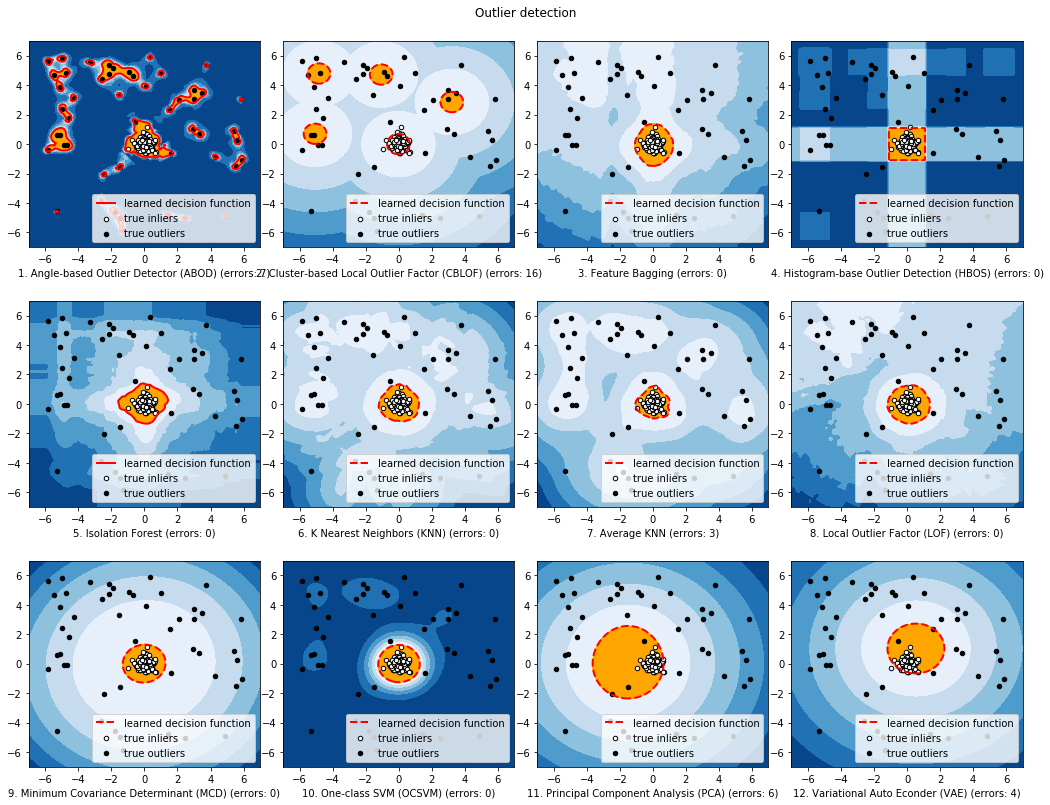

In [10]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    print (np.shape(X))
    # Fit the model
    plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        #print("X = ",X)
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(3, 4, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()

In [13]:
X = elon_df.values
print (np.shape(X))
print (type(X))
X.shape[1]

(9708, 20)
<class 'numpy.ndarray'>


20

In [92]:
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.vae import VAE

ndim = X.shape[1] #the number of features
random_state = np.random.RandomState(42)
outlier_fraction = 0.01 #1% of all tweets are outliers
classifiers = {
    'Variational Auto Encoder (VAE)': VAE(epochs=20,
            contamination = outlier_fraction, random_state = random_state,
            encoder_neurons = [ndim,max(int(ndim/2),1),max(int(ndim/4),1)],
            decoder_neurons = [max(int(ndim/4),1),max(int(ndim/2),1),20],
            verbosity=0)
}

for i, (clf_name,clf) in enumerate(classifiers.items()):
    print(i + 1, 'fitting', clf_name)
    clf.fit(X)
    scores_pred = clf.decision_function(X) * -1
    y_pred = clf.predict(X)
    threshold = percentile(scores_pred,100 * outlier_fraction)

1 fitting Variational Auto Encoder (VAE)


/Users/JJ/opt/anaconda3/envs/insight/lib/python3.8/site-packages/keras/engine/training_utils.py:816: UserWarning: Output model_8 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_8.
  warnings.warn(


In [15]:
print(np.shape(scores_pred))
print(np.shape(y_pred))
print(np.shape(threshold))

(9708,)
(9708,)
()


In [16]:
threshold

-8.292733358934067

In [17]:
scores_pred[0:20]

array([ -2.70078994, -97.11478442,  -2.87507558,  -3.79969573,
        -3.11526077,  -4.25662574,  -5.81928651,  -4.21807089,
        -5.37121999,  -3.02451361,  -2.57165983,  -3.87255845,
        -3.3052413 ,  -2.63793085,  -2.71477409,  -2.29140003,
        -3.791143  ,  -4.76571288,  -2.99033328,  -3.75428232])

In [18]:
y_pred[0:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
scores_pred[len(scores_pred)-21:]

array([-2.90745423, -1.98783075, -2.71644625, -3.89548244, -3.57691608,
       -3.07106059, -2.1358076 , -3.10400597, -4.3463884 , -3.103163  ,
       -1.81444344, -2.63113661, -2.6136433 , -4.07005099, -2.27332482,
       -3.99893117, -4.13125647, -2.22985732, -2.23885747, -1.96303204,
       -2.06149697])

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [21]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(elon_df)

In [22]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x14a03df70>,
 <a list of 20 Text xticklabel objects>)

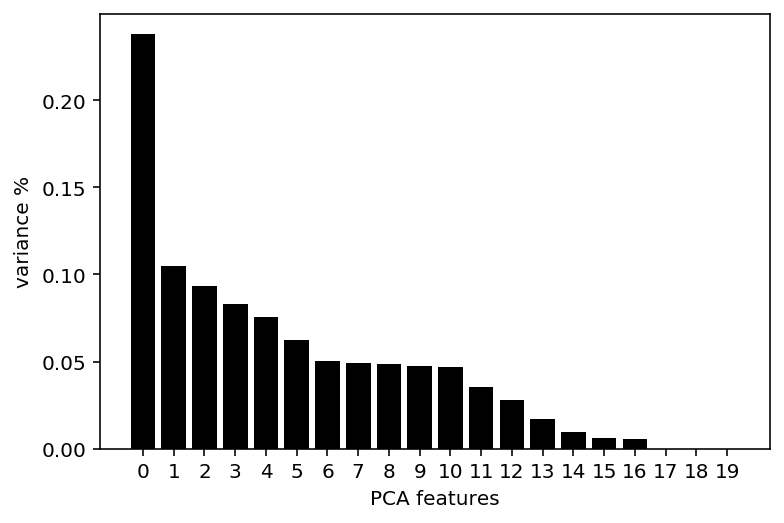

In [23]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [25]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

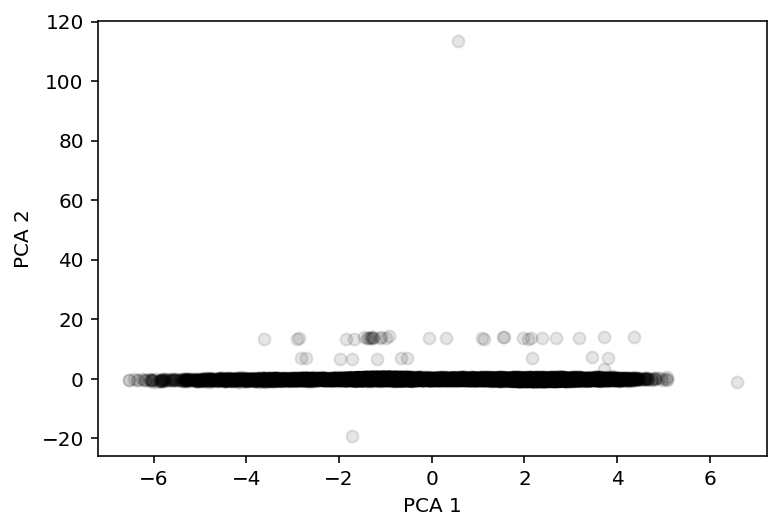

In [27]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 5')

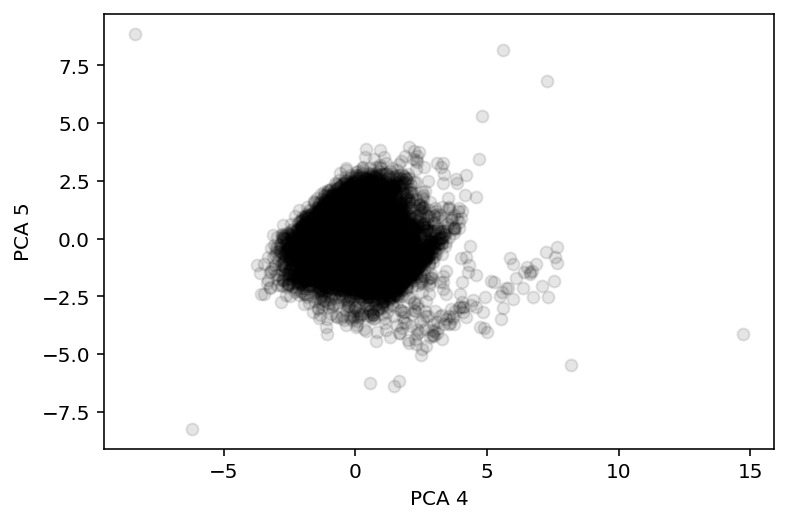

In [32]:
plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')

Text(0, 0.5, 'PCA 7')

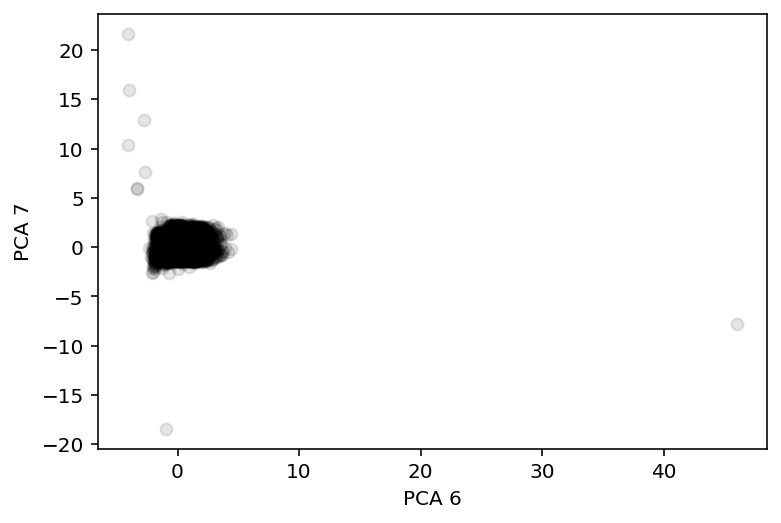

In [37]:
plt.scatter(PCA_components[5], PCA_components[6], alpha=.1, color='black')
plt.xlabel('PCA 6')
plt.ylabel('PCA 7')

In [34]:
joint_df = PCA_components
joint_df['anomalies'] = y_pred

In [90]:
tweets_df = pd.read_csv('./tweet_data/elonmusk.csv').drop('Unnamed: 0',axis='columns')
unscaled_df = pd.read_csv('./tweet_data/unscaled_tweet_features.csv').drop('Unnamed: 0',axis='columns')
elon_df.columns

Index(['hashtags_token', 'mentions_token', 'reply_to_token', 'text_neg',
       'text_neu', 'text_pos', 'text_compound', 'hashtags_neg', 'hashtags_neu',
       'hashtags_pos', 'hashtags_compound', 'hour', 'delta_time',
       'log10_delta_time', 'dcompound_dTime', 'dcompound_dTweet',
       'integral_compound_5', 'integral_compound_10', 'delta_compound_mean',
       'delta_compound_median'],
      dtype='object')

In [91]:
unscaled_df.columns

Index(['username', 'tweet_id', 'reply_to', 'retweets', 'favorites', 'hashtags',
       'mentions', 'text', 'permalink', 'Time', 'hashtags_token',
       'mentions_token', 'reply_to_token', 'text_neg', 'text_neu', 'text_pos',
       'text_compound', 'hashtags_neg', 'hashtags_neu', 'hashtags_pos',
       'hashtags_compound', 'hour', 'delta_time', 'log10_delta_time',
       'dcompound_dTime', 'dcompound_dTweet', 'integral_compound_5',
       'integral_compound_10', 'delta_compound_mean', 'delta_compound_median'],
      dtype='object')

Text(0.5, 1.0, '$1\\%$Anomalies')

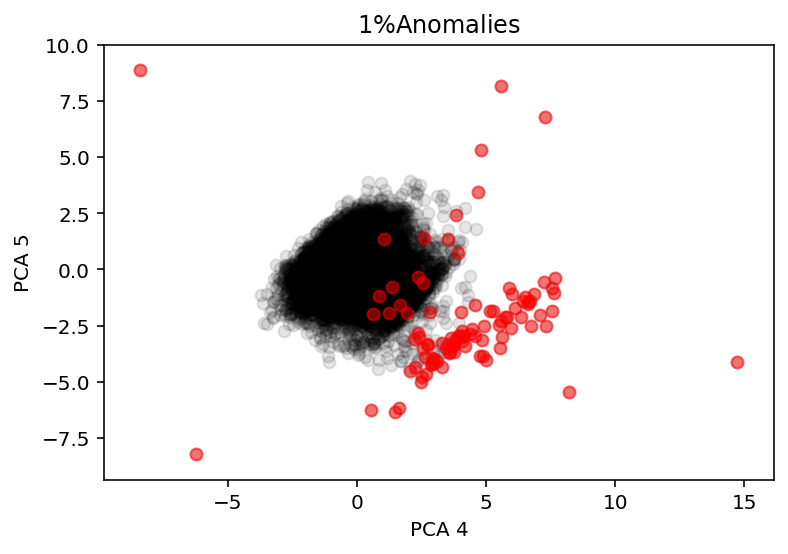

In [36]:
plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
plt.scatter(PCA_components[joint_df['anomalies']==1][3], 
            PCA_components[joint_df['anomalies']==1][4], alpha=.5, color='red')
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'$1\%$Anomalies')

Text(0.5, 1.0, 'Used Hashtags')

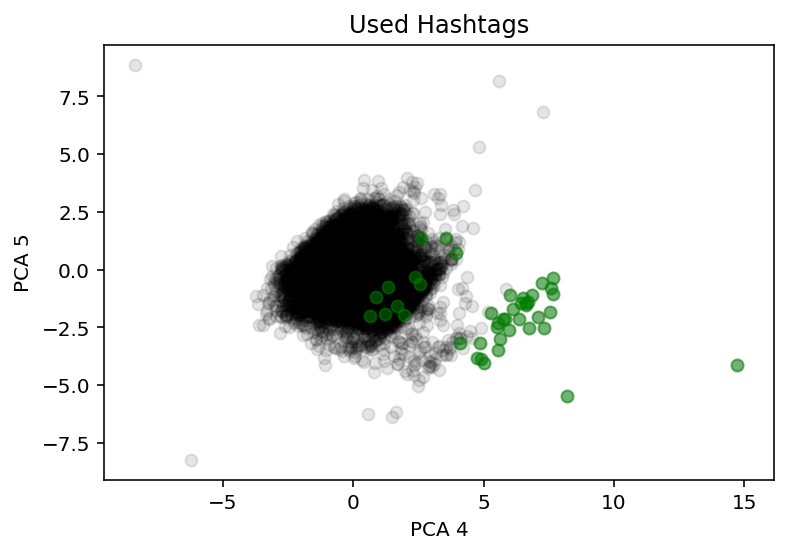

In [42]:
plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
plt.scatter(PCA_components[elon_df['hashtags_token']==1][3], 
            PCA_components[elon_df['hashtags_token']==1][4], alpha=.5, color='green')
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'Used Hashtags')

Text(0.5, 1.0, 'Used Mentions')

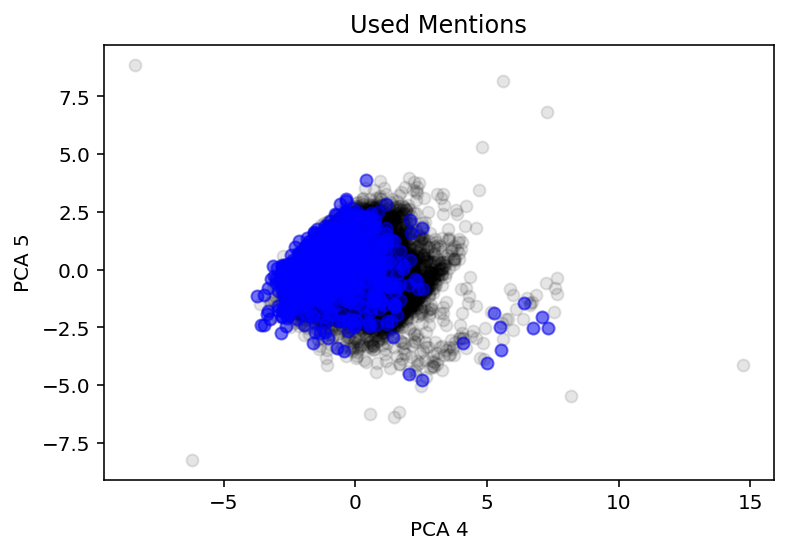

In [44]:
plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
plt.scatter(PCA_components[elon_df['mentions_token']==1][3], 
            PCA_components[elon_df['mentions_token']==1][4], alpha=.5, color='blue')
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'Used Mentions')

Text(0.5, 1.0, 'Self Tweet')

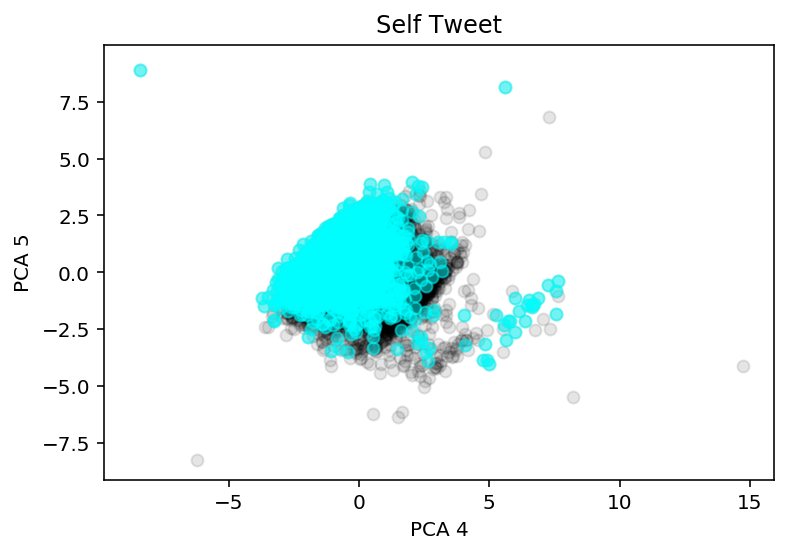

In [48]:
plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
plt.scatter(PCA_components[elon_df['reply_to_token']==0][3], 
            PCA_components[elon_df['reply_to_token']==0][4], alpha=.5, color='cyan')
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'Self Tweet')

Text(0.5, 1.0, '$> 1$ day between tweets')

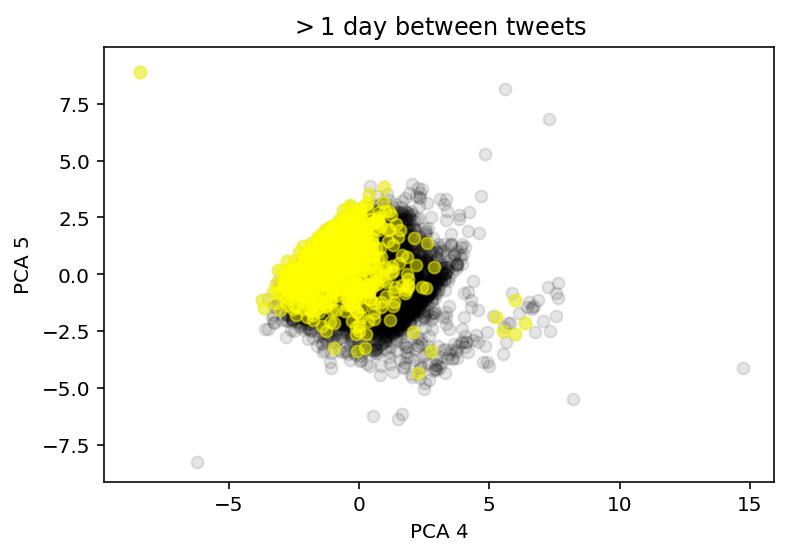

In [53]:
plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
plt.scatter(PCA_components[unscaled_df['delta_time']>86400.][3], 
            PCA_components[unscaled_df['delta_time']>86400.][4], alpha=.5, color='yellow')
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'$> 1$ day between tweets')

Text(0.5, 1.0, '$< 10$ minutes between tweets')

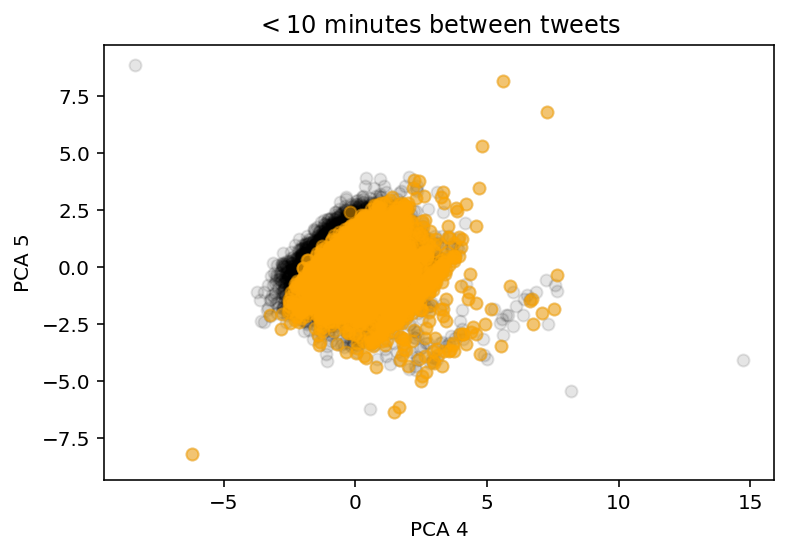

In [56]:
plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
plt.scatter(PCA_components[unscaled_df['delta_time']<600.][3], 
            PCA_components[unscaled_df['delta_time']<600.][4], alpha=.5, color='orange')
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'$< 10$ minutes between tweets')

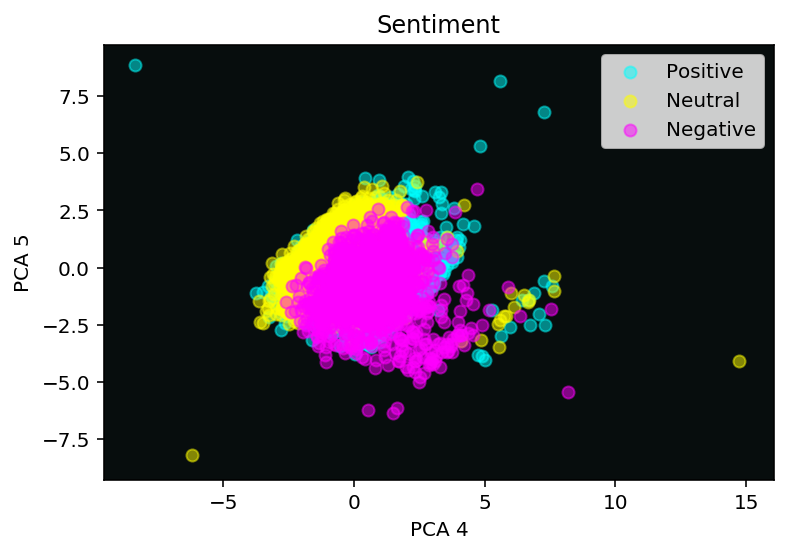

In [66]:
#plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
ax = plt.gca()
plt.scatter(PCA_components[unscaled_df['text_compound']>.05][3], 
            PCA_components[unscaled_df['text_compound']>.05][4], alpha=.5, color='cyan')
plt.scatter(PCA_components[(.05>unscaled_df['text_compound']) & (unscaled_df['text_compound']>-.05)][3], 
            PCA_components[(.05>unscaled_df['text_compound']) & (unscaled_df['text_compound']>-.05)][4],
            alpha=.5, color='yellow')
plt.scatter(PCA_components[unscaled_df['text_compound']<-.05][3], 
            PCA_components[unscaled_df['text_compound']<-.05][4], alpha=.5, color='magenta')
plt.legend([r'Positive',r'Neutral',r'Negative'])
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'Sentiment')
ax.set_facecolor('#070d0d')

In [77]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(elon_df[joint_df['anomalies']==1])
anom_unscaled_df = unscaled_df[joint_df['anomalies']==1]

In [89]:
elon_df[joint_df['anomalies']==1].columns

Index(['hashtags_token', 'mentions_token', 'reply_to_token', 'text_neg',
       'text_neu', 'text_pos', 'text_compound', 'hashtags_neg', 'hashtags_neu',
       'hashtags_pos', 'hashtags_compound', 'hour', 'delta_time',
       'log10_delta_time', 'dcompound_dTime', 'dcompound_dTweet',
       'integral_compound_5', 'integral_compound_10', 'delta_compound_mean',
       'delta_compound_median'],
      dtype='object')

In [88]:
unscaled_df[joint_df['anomalies']==1].columns

Index(['username', 'tweet_id', 'reply_to', 'retweets', 'favorites', 'hashtags',
       'mentions', 'text', 'permalink', 'Time', 'hashtags_token',
       'mentions_token', 'reply_to_token', 'text_neg', 'text_neu', 'text_pos',
       'text_compound', 'hashtags_neg', 'hashtags_neu', 'hashtags_pos',
       'hashtags_compound', 'hour', 'delta_time', 'log10_delta_time',
       'dcompound_dTime', 'dcompound_dTweet', 'integral_compound_5',
       'integral_compound_10', 'delta_compound_mean', 'delta_compound_median'],
      dtype='object')

In [68]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x1516dd9d0>,
 <a list of 20 Text xticklabel objects>)

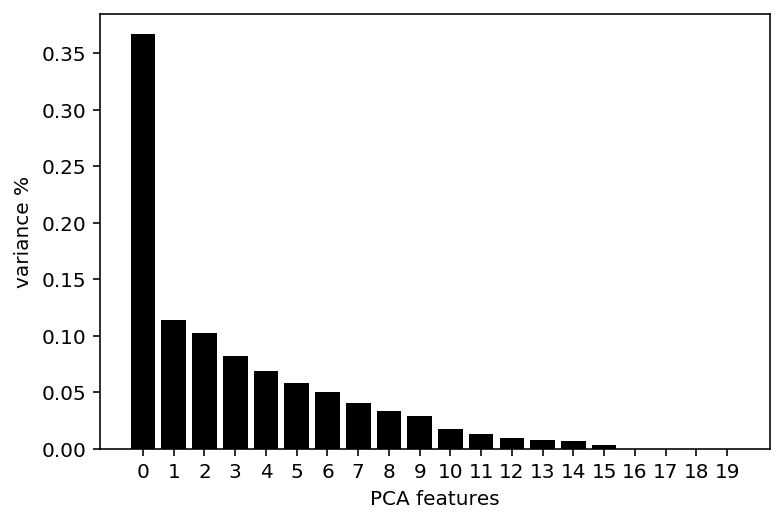

In [69]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [70]:
# Save components to a DataFrame
anom_PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

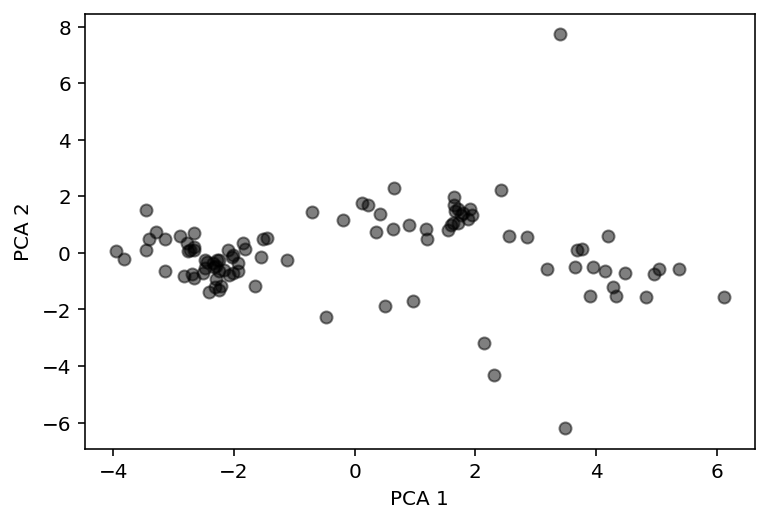

In [72]:
#Looking for clusters in just the anomaly data
plt.scatter(anom_PCA_components[0], anom_PCA_components[1], alpha=.5, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#this is definitely the best example

In [82]:
anom_unscaled_df.shape

(98, 30)

In [83]:
anom_PCA_components.shape

(98, 20)

<ipython-input-93-294b5ce21b83>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(anom_PCA_components[elon_df['text_compound']>.05][0],
<ipython-input-93-294b5ce21b83>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anom_PCA_components[elon_df['text_compound']>.05][1], alpha=.5, color='cyan')
<ipython-input-93-294b5ce21b83>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(anom_PCA_components[(.05>elon_df['text_compound']) & (anom_unscaled_df['text_compound']>-.05)][0],
<ipython-input-93-294b5ce21b83>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anom_PCA_components[(.05>elon_df['text_compound']) & (anom_unscaled_df['text_compound']>-.05)][1],
<ipython-input-93-294b5ce21b83>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(anom_PCA_components[elon_df['text_compound']<-.05][0],
<ipython-input

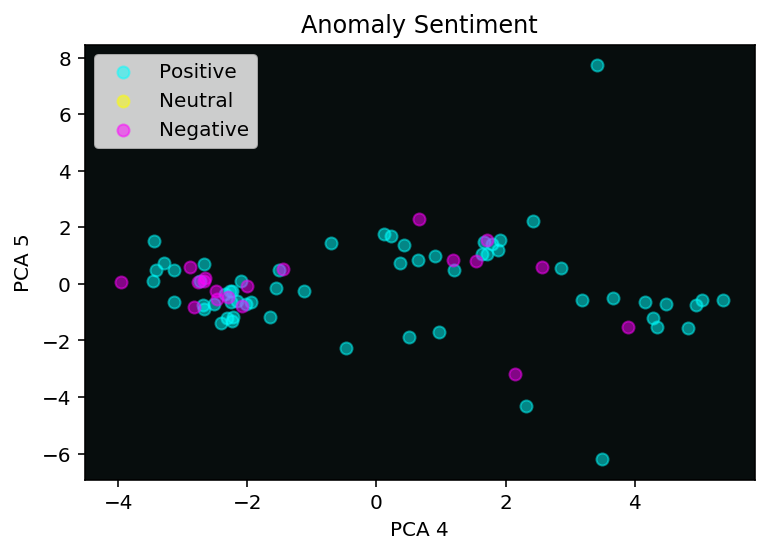

In [93]:
#plt.scatter(PCA_components[3], PCA_components[4], alpha=.1, color='black')
ax = plt.gca()
plt.scatter(anom_PCA_components[elon_df['text_compound']>.05][0], 
            anom_PCA_components[elon_df['text_compound']>.05][1], alpha=.5, color='cyan')
plt.scatter(anom_PCA_components[(.05>elon_df['text_compound']) & (anom_unscaled_df['text_compound']>-.05)][0], 
            anom_PCA_components[(.05>elon_df['text_compound']) & (anom_unscaled_df['text_compound']>-.05)][1],
            alpha=.5, color='yellow')
plt.scatter(anom_PCA_components[elon_df['text_compound']<-.05][0], 
            anom_PCA_components[elon_df['text_compound']<-.05][1], alpha=.5, color='magenta')
plt.legend([r'Positive',r'Neutral',r'Negative'])
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.title(r'Anomaly Sentiment')
ax.set_facecolor('#070d0d')